> 原文地址 [www.cnblogs.com](https://www.cnblogs.com/meandme/p/10062512.html)

1      OPC 服务器
==============

OPC 服务器, 是指按照 OPC 基金组织规定的 OPC 规范群开发的软件驱动。OPC 服务器作为中间媒介负责从数据源读取数据再跟另外一端的客户端通信。在 [OPC 客户端 / 服务器](http://www.matrikonopc.cn/opc-server/opc-client-server.aspx) 的结构图中, 通信的发起端是, 也只能是 OPC 客户端。客户端和服务器的对话是双向的, 也就是说, 客户端既可以从服务器读出也可以向服务器写入。

TOPC 基金会定义了四种不同类型的 OPC 服务器。他们分别是:

*   **OPC****数据访问服务器**（OPC DA） – 它基于 [OPC 数据访问规范](http://www.matrikonopc.cn/opc-server/opc-data-access-versions.aspx), 是一种为实时数据通讯特别定义的服务器类别。
*   **OPC****历史数据访问服务器**（OPC HDA） – 它基于 OPC 历史数据访问规范, 是用来给支持 OPC 历史数据访问规范的客户端供给历史数据的服务器。
*   **OPC****报警与事件服务器 （OPC AE）** – 它基于 OPC 报警与事件访问规范, 为支持 OPC 报警与事件规范的客户端传送报警与时间信息。
*   **OPC UA****服务器** - 它基于 OPC 基金总会最新并且最先进的 UA 规范,**使得 OPC 服务器可以与任何数据形式兼容。**

总体来说, 前面三种是存在时间比较长久且比较经典的服务器类型, 但最后一款OPC UA 服务器会随着时间的推移成为今后 OPC 服务器的中流砥柱。

 ![][img-0]

1）OPC 客户端与 OPC 服务器（OPC 数据访问服务器、OPC 历史数据访问服务器或 OPC 报警与事件服务器) 的通信

OPC 服务器是利用 Microsoft Windows 的 COM/DCOM 技术作为数据交换的方式。这就是说**OPC 服务器必须安装在支持 Microsoft Windows 操作系统的 PC 上**。一个 OPC 服务器可以同时跟多于一个的 OPC 客户端 通讯。

2）OPC 服务器 – 数据传译器

**OPC 服务器**的一个**关键作用**就是**将以数据源输出形式传送的数据,** 翻译成支持之前提到的某一或多于一种的 OPC 数据访问规范形式！！！（比如说, OPC 实时数据访问规范）。OPC 数据规范群只是定义了 OPC 服务器的 OPC 通讯模块, 所以数据形式翻译模块的准确性和高效性就完全取决于 OPC 服务器供应商的开发方式。

3）OPC 服务器与数据源的通信

OPC 服务器和数据源用数据源支持的数据形式通信。数据源可以是某个硬件设备, 某个控制器或者是某个应用程序。因为数据源可以各种各样, 而每一个不同形式的数据源又都用自己的通讯协议或者 API 可以通过多个物理通信方式（串行 RS485, RS232, 以太网, 无线通讯等）通信, 所以**OPC 数据规范群并没有定义 OPC 服务器和数据源之间的交流法则**。 两个关于 OPC 服务器和数据源通讯的最普遍的例子就是：

通过为一个为某数据源特别编写的服务器的 API；

通过一个可以是专属于某一个数据源（请参见 MatrikonOPC 霍尼韦尔 TPS 服务器）， 也可也是开放式（请参见 MatrikonOPC Modbus 服务器）的通信协议。

2      实现与 SIMATIC NET OPC DA 通讯
================================

OPC 是 Object Linking and Embedding（OLE）forProcess Control 的缩写，它是微软公司的对象链接和嵌入技术在过程控制方面的应用。OPC 以 OLE/COM/DCOM 技术为基础，采用客户 / 服务器模式，为工业自动化软件面向对象的开发提供了统一的标准，这个标准定义了应用 Microsoft 操作系统在基于 PC 的客户机之间交换自动化实时数据的方法，采用这项标准后，硬件开发商将取代软件开发商为自己的硬件产品开发统一的 OPC 接口程序，而软件开发者可免除开发驱动程序的工作，充分发挥自己的特长，把更多的精力投入到其核心产品的开发上。

SimaticNet 是西门子全集成自动化系统中的一个重要组成部分，它为完善的工业自动化控制系统的通讯提供部件和网络，同时提供多个 OPCServer，为数据的外部访问提供接口，本文主要以 OPC.SimaticNET 为例说明。

90 年代 OPC 基金会开发了一系列的通讯接口比如 Data Access (DA), Alarm & Events (A&E), Historical Data Access (HDA) and Data eXchange (DX)，**统称传统 OPC**。今天主要使用的 OPC DA 通讯方式，这个在 1995 年左右还是很流行的方法，最近几年 OPC Foundation 又开发了新的 **OPC Unified Architecture (UA)**标准，更好的适应了工业 4.0。关于传统 OPC 和 OPC UA 的区别，后面会单独来说。

许多 OPC 服务器，包括 OPC.SimaticNet，是在 COM 平台开发的，从而对于基于. NET 框架下的 C# 语言，作为客户端程序语言访问 OPCServer，需要解决两个平台间无缝迁移的问题。OPC 基金会对会员提供了 OpcRcw 动态链接库，OPC NET COM 包装器和 OPC NET API，将 OPC 复杂的规范封状成简单易用的 C# 类 ，可以比较容易地实现数据访问。

OPC 主要包含两种接口：CUSTOM 标准接口和 OLE 自动化标准接口，自定义接口是服务商必须提供的，而自动化接口则是可选的。

自定义接口是一组 COM 接口，主要用于采用 C++ 语言的应用程序开发；

自动化接口是一组 OLE 接口，主要用于采用 VB，DELPHI，Excel 等基于脚本编程语言的应用程序开发。本文是使用 C# 通过自动化接口来实现的，也是最简单的方式。

首先必须了解的是 OPC 服务器的对象模型：

 ![][img-1]

![][img-2]

程序中涉及到的重要方法和属性比较多，解释下几个容易搞混的：

OPCItem 对象的属性 ServerHandle，只读属性，服务器提供给 Item 的句柄，通过此句柄，Client 可以定位到此 Item，来对此 Item 进行后续的操作，比如移动删除；

OPCItem 对象的属性 ClientHandle，可读可写属性，客户端分配给 Item 的句柄，这个句柄可以手动设置，也可由. NET 随机选取的，不需要我们来设置，并且每次运行时，这

个句柄都不同，类似于 TCP scoket 通讯中的 Client 端分配的端口号。Server 端必须指定端口号，Client 端随机生成，每次都不一样。

OPCGroup 对象的属性的 IsSubscribed，可读可写属性，Group 的 IsSubscribed 为 True，此 Group 才能开始接受服务器的数据属性，此 Group 才能被订阅。

OPCGroup 对象的事件 DataChange (TransactionID As Long, NumItems As Long, ClientHandles() As Long,ItemValues() As Variant, Qualities() As Long, TimeStamps() As Date) 需要注意的是 NumItems 参数是每次事件触发时 Group 中实际发生数据变化的 Item 的数量，而不是整个 Group 里的 Items.

OPCGroup 对象的属性 UpdateRate，可读可写属性，规定了数据刷新的周期，单位 milliseconds. 注意的是，不是设定多少 ms，实际就是多少，比如给定 53ms,OPC server 会就近选择 50ms. 有区间划分的。

从整体上说下**OPC DA 的协议规范**，OPC DA 是在 WINDOWS 的 COM/DOM 技术上定义的接口定义，在 TCP IP 七层模型的最高层应用层，决定了它**必须运行在 WINDOWS 平台**，不能够跨平台，灵活性和安全性不如 OPC UA，因为 OPC DA 的会话层和表示层用户是有权利来使用的。

[img-0]: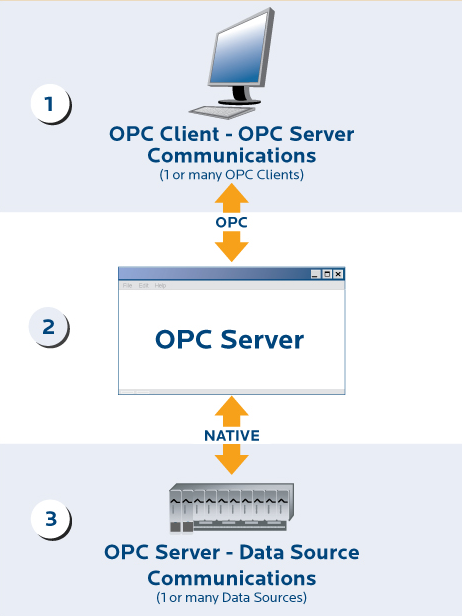

[img-1]: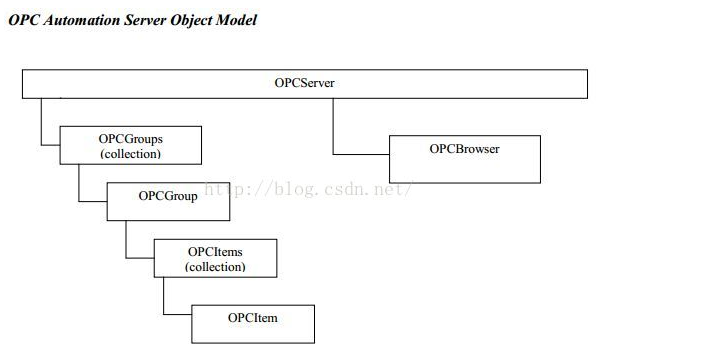

[img-2]: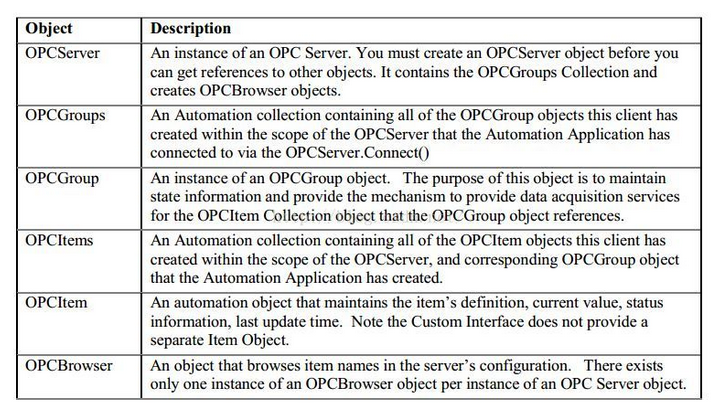